In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gan import gan as GAN

100%|██████████| 3050/3050 [02:46<00:00, 18.29it/s]


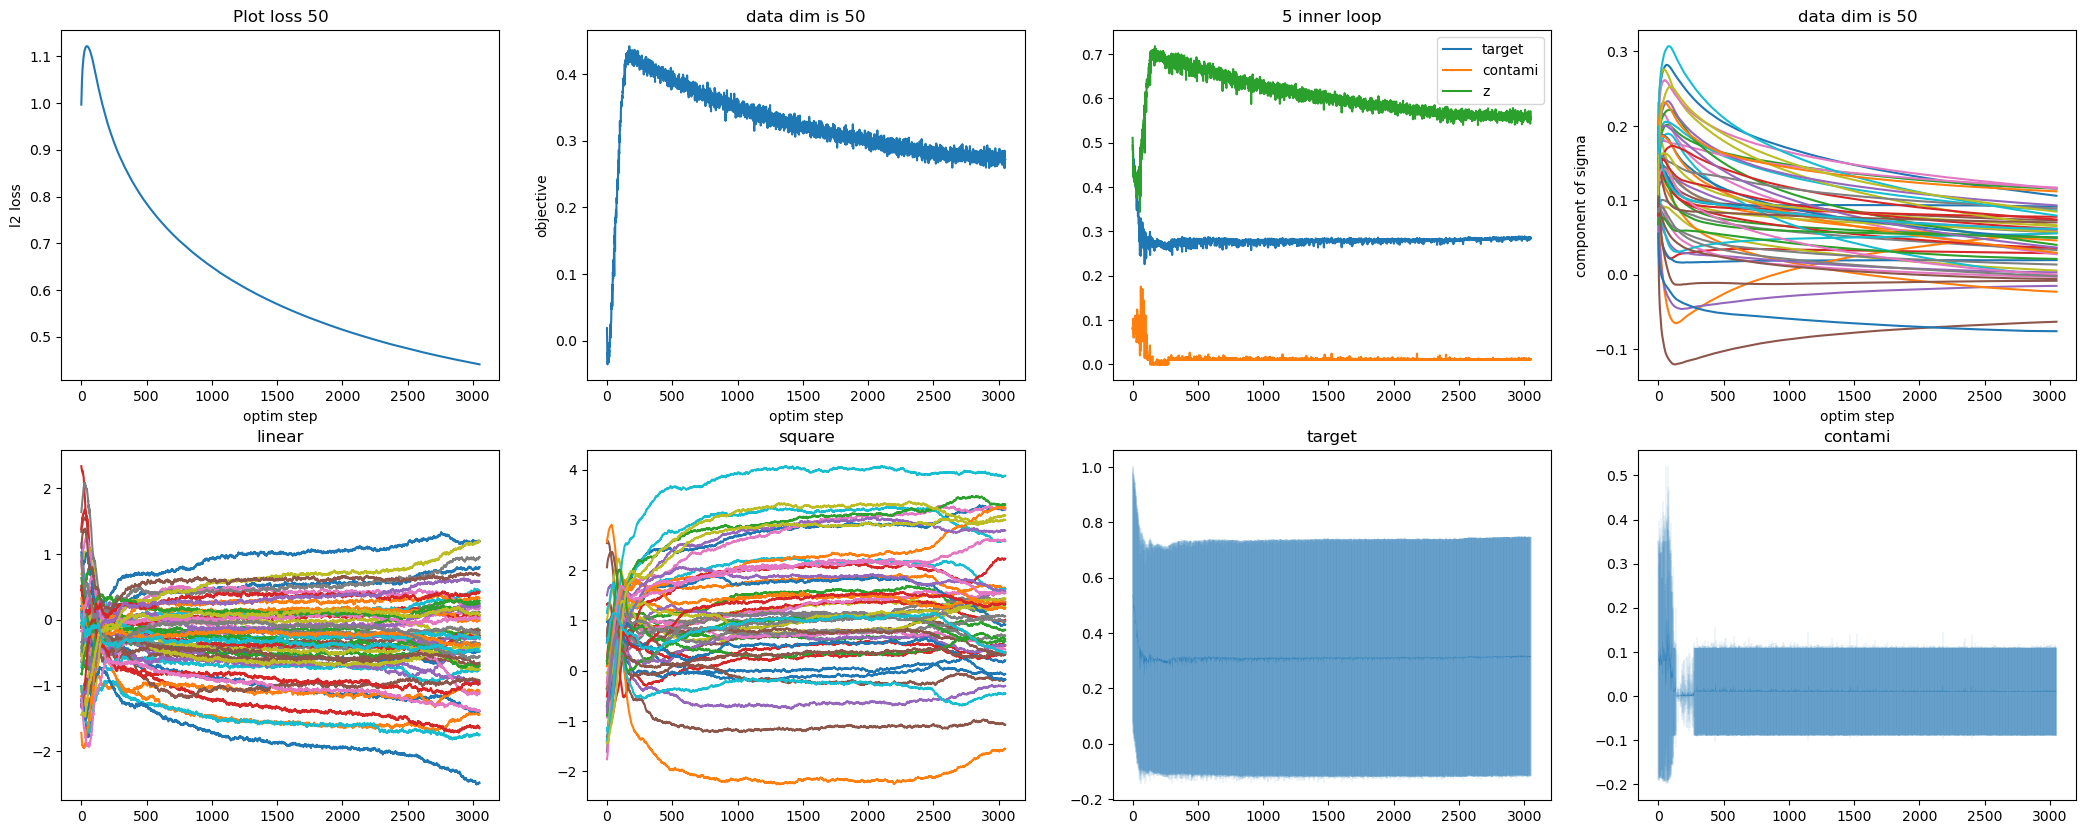

In [8]:
gan = GAN(50, 0.1)
gan.dist_init('mu', 0, 5)
gan.data_init(1000, 5)
gan.model_init()
gan.optimizer_init(lr_d=1, lr_g=0.5, decay_g=0.95, reg_d=1e-4, reg_g=3e-5, 
                   update_D_iter=5, is_mm_alg=False, decay_d=0, grad_clip=1e-3, lr_schedule='exp',step=200)
gan.fit(3050, 1e-7, True)
gan.record_npy(rcd_dir='record', rcd_name=f'est_mu_dim{gan.data_dim}_0')
gan.plot()

(-1.5, 1.5)

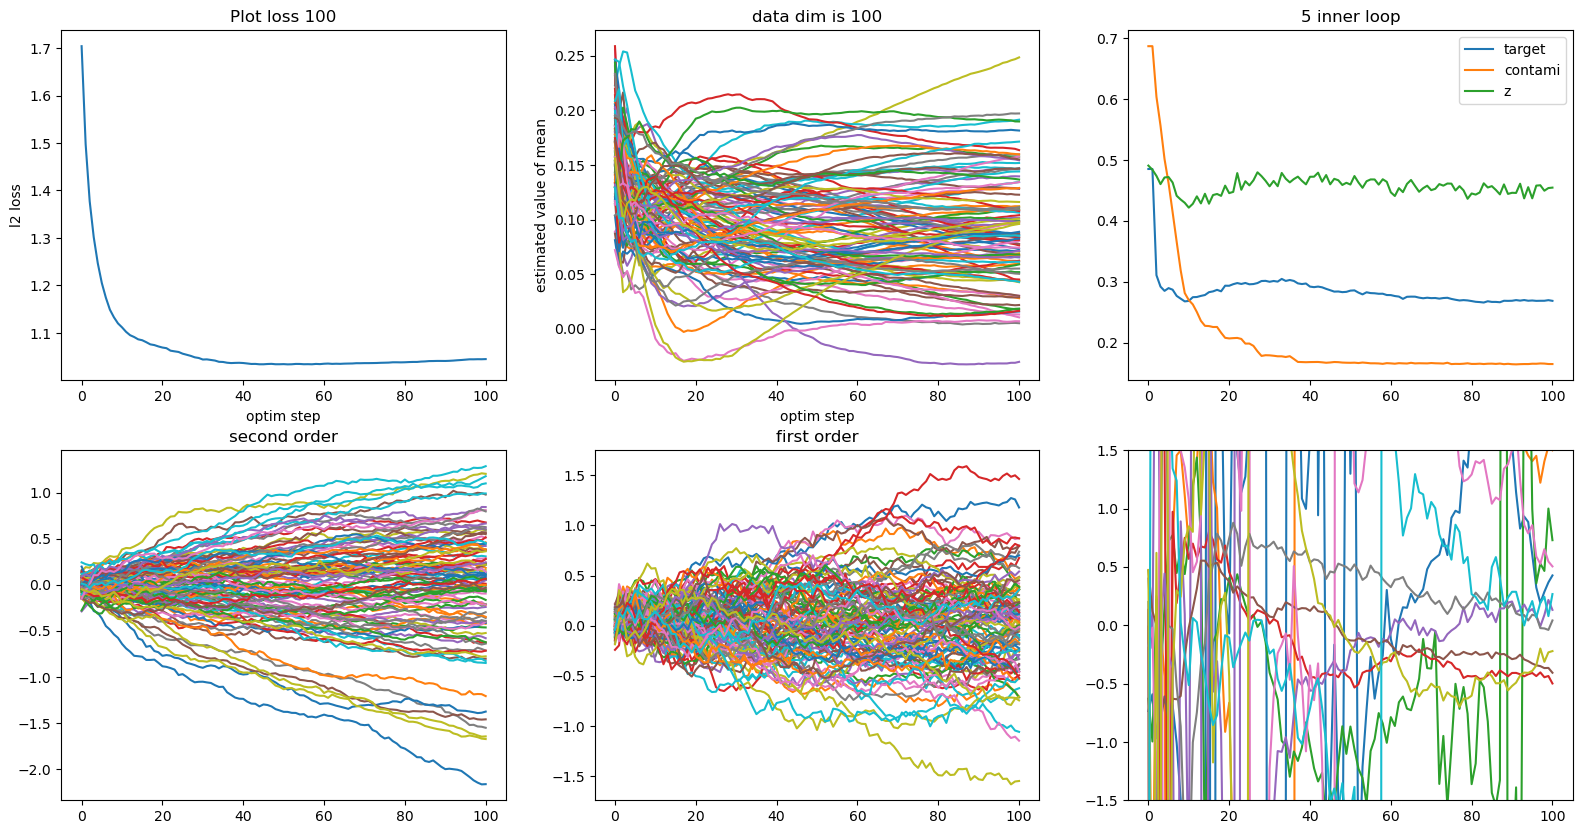

In [39]:
col_num = 3
row_num = 2
plt.figure(figsize=(6.5 * col_num, 5 * row_num))
plt.subplot(row_num, col_num, 1)
plt.plot(gan.l2_loss)
plt.xlabel('optim step')
plt.ylabel('l2 loss')
plt.title(f'Plot loss {gan.data_dim}')
plt.subplot(row_num, col_num, 2)
# for mean in gan.emperical_true_mean:
#     plt.hlines(mean, 0, gan.optim_iter, colors='r', lw=1)
plt.plot(np.array(gan.G_record))
plt.xlabel('optim step')
plt.ylabel('estimated value of mean')
plt.title(f'data dim is {gan.data_dim}')
# plt.legend()
plt.subplot(row_num, col_num, 3)
plt.plot(gan.D_data_record, label='target')
plt.plot(gan.D_contami_record_mean,label='contami')
plt.plot(gan.D_z_record, label='z')
plt.title(f'{gan.update_D_iter} inner loop')
plt.legend()

plt.subplot(row_num, col_num, 4)
plt.plot(np.array(gan.D_record)[:,:gan.data_dim]);
plt.title('second order')
plt.subplot(row_num, col_num, 5)
plt.plot(np.array(gan.D_record)[:,gan.data_dim:]);
plt.title('first order')
D_rec = np.array(gan.D_record)
plt.subplot(row_num, col_num, 6)
vertex = - 0.5 * D_rec[:, gan.data_dim:] / D_rec[:, :gan.data_dim]
vertex = vertex[:, :10]
plt.plot(vertex)
plt.ylim(-1.5, 1.5)

# dim5 n=1k
([0.22234818175716328,
  0.20798576244489284,
  0.23060246449606656,
  0.1834216074004128,
  0.24535612861221595,
  0.20013906162557882,
  0.07170940492413795,
  0.19153367220191897,
  0.3794297493987454,
  0.22187018194436273],
 [0.28201697635528267,
  0.2862057845788803,
  0.2819258788634058,
  0.26043434741134974,
  0.30309011186334256,
  0.26261727446770994,
  0.09438818771124438,
  0.2648104835774959,
  0.4361371211696435,
  0.24079968073682645])
# dim5 n=50k
([0.2456707764450429,
  0.16296808037679478,
  0.11442080077691978,
  0.23153354892702954,
  0.13829760644721145,
  0.26140451380799967,
  0.190969595442561,
  0.2039053440997111,
  0.1884322385612937,
  0.12959441668626323],
 [0.2732772675285,
  0.1843007104287859,
  0.1315529460438685,
  0.24903310556870387,
  0.17275876402805787,
  0.28050329557648895,
  0.22366734104122235,
  0.24381188806467533,
  0.23200579667077886,
  0.18729053480888588])


  # dim10 n=50k
  ([0.1678748500989659,
  0.18648115937512402,
  0.21266532606941915,
  0.2094261946514725,
  0.15841293676328702,
  0.2515520545575672,
  0.20660857359292795,
  0.14232399090570308,
  0.18486599680839563,
  0.25346508371862075],
 [0.2540606494689612,
  0.24793475701317308,
  0.30157813849530396,
  0.25790955980485336,
  0.27384610703552903,
  0.31209091666359295,
  0.28719227440167017,
  0.2181349351933922,
  0.27096290223500513,
  0.3363113891993084])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gan import gan as GAN

100%|██████████| 950/950 [00:12<00:00, 76.43it/s]


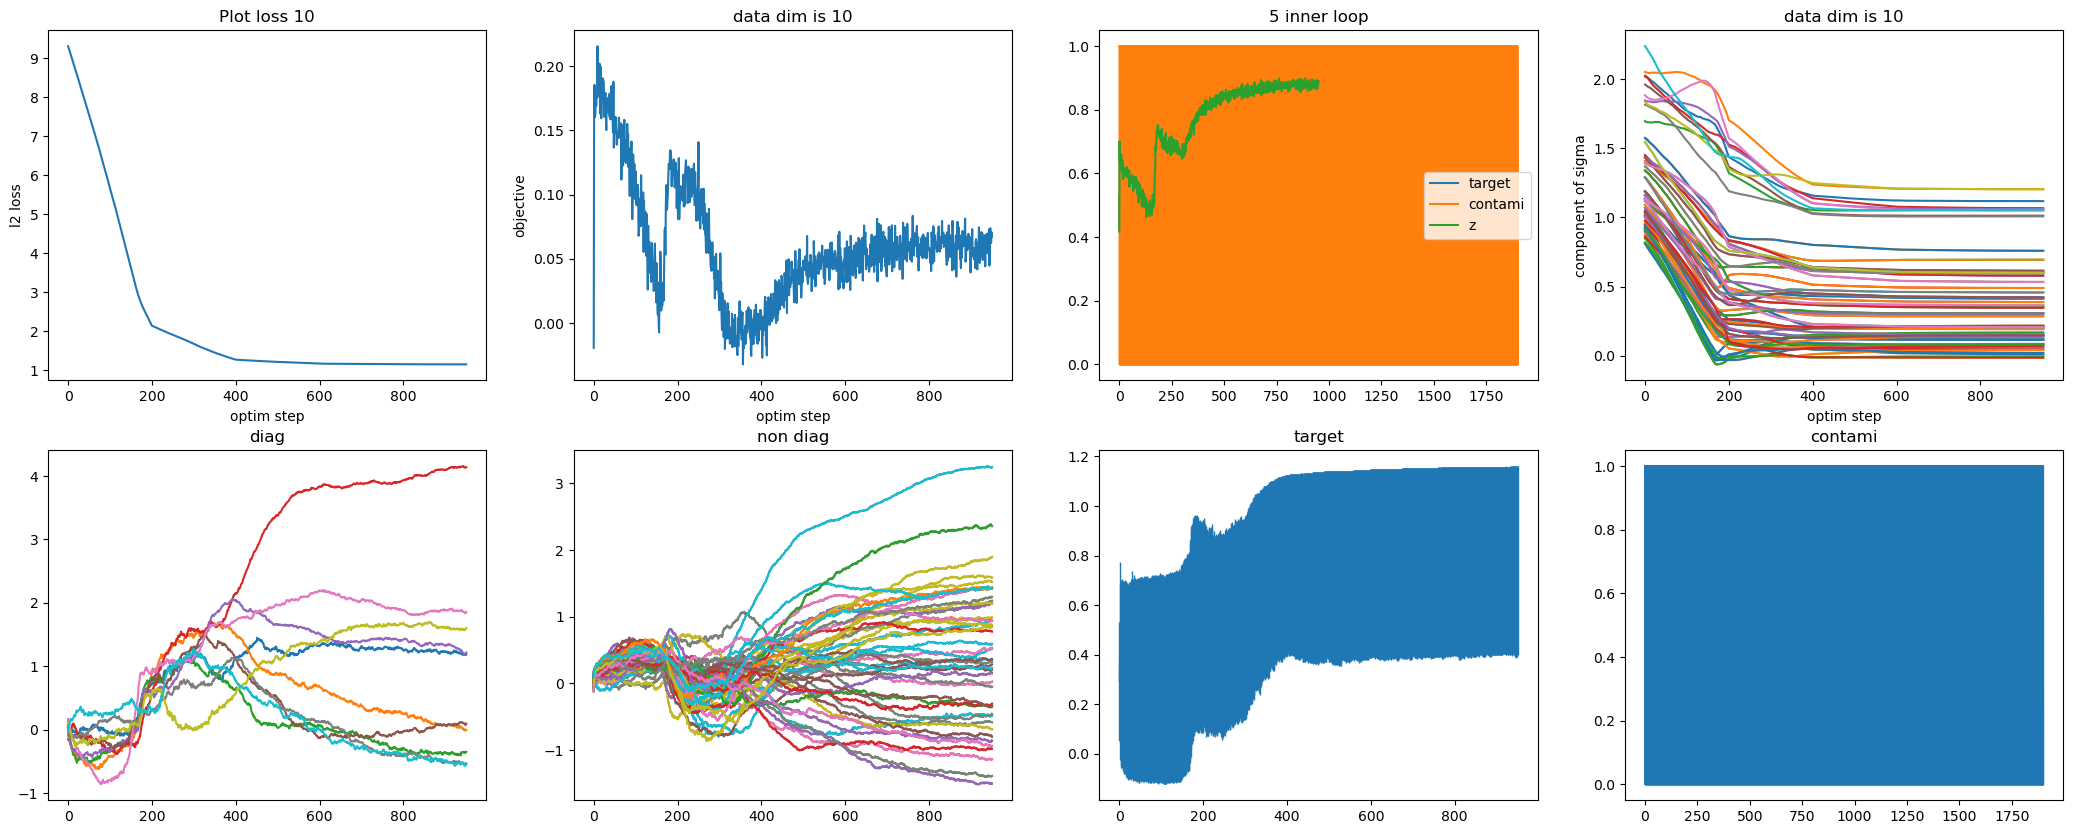

100%|██████████| 950/950 [00:12<00:00, 76.66it/s]


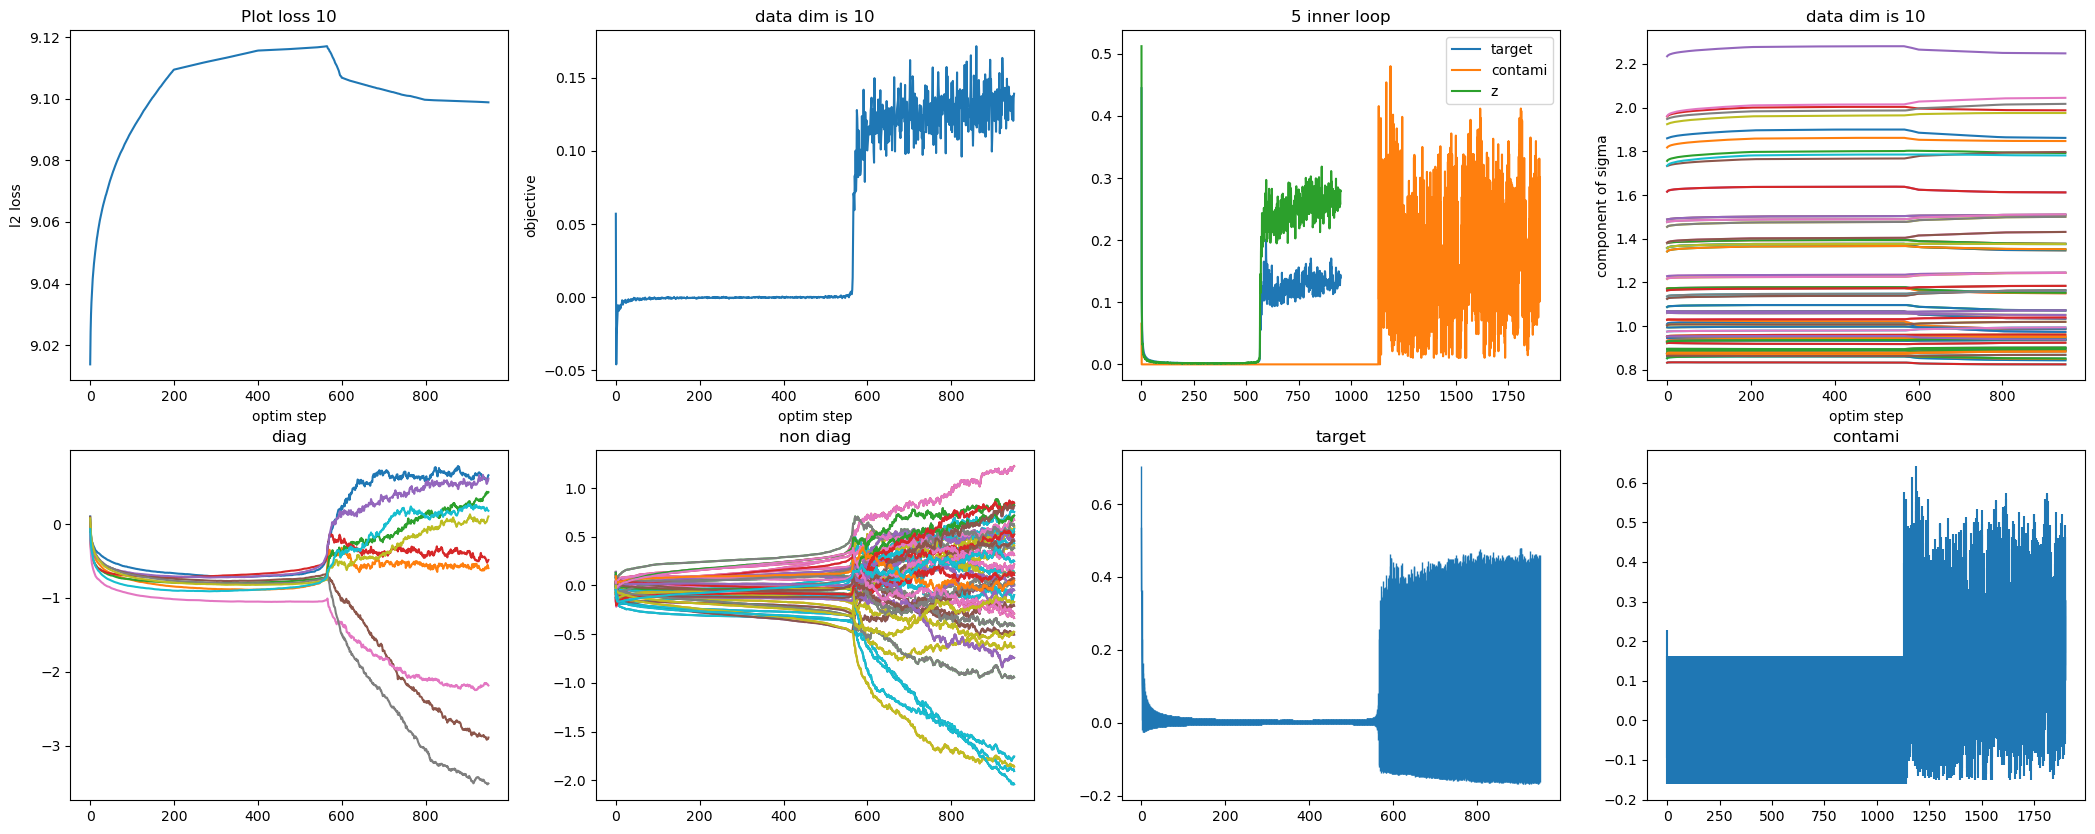

100%|██████████| 950/950 [00:12<00:00, 74.46it/s]


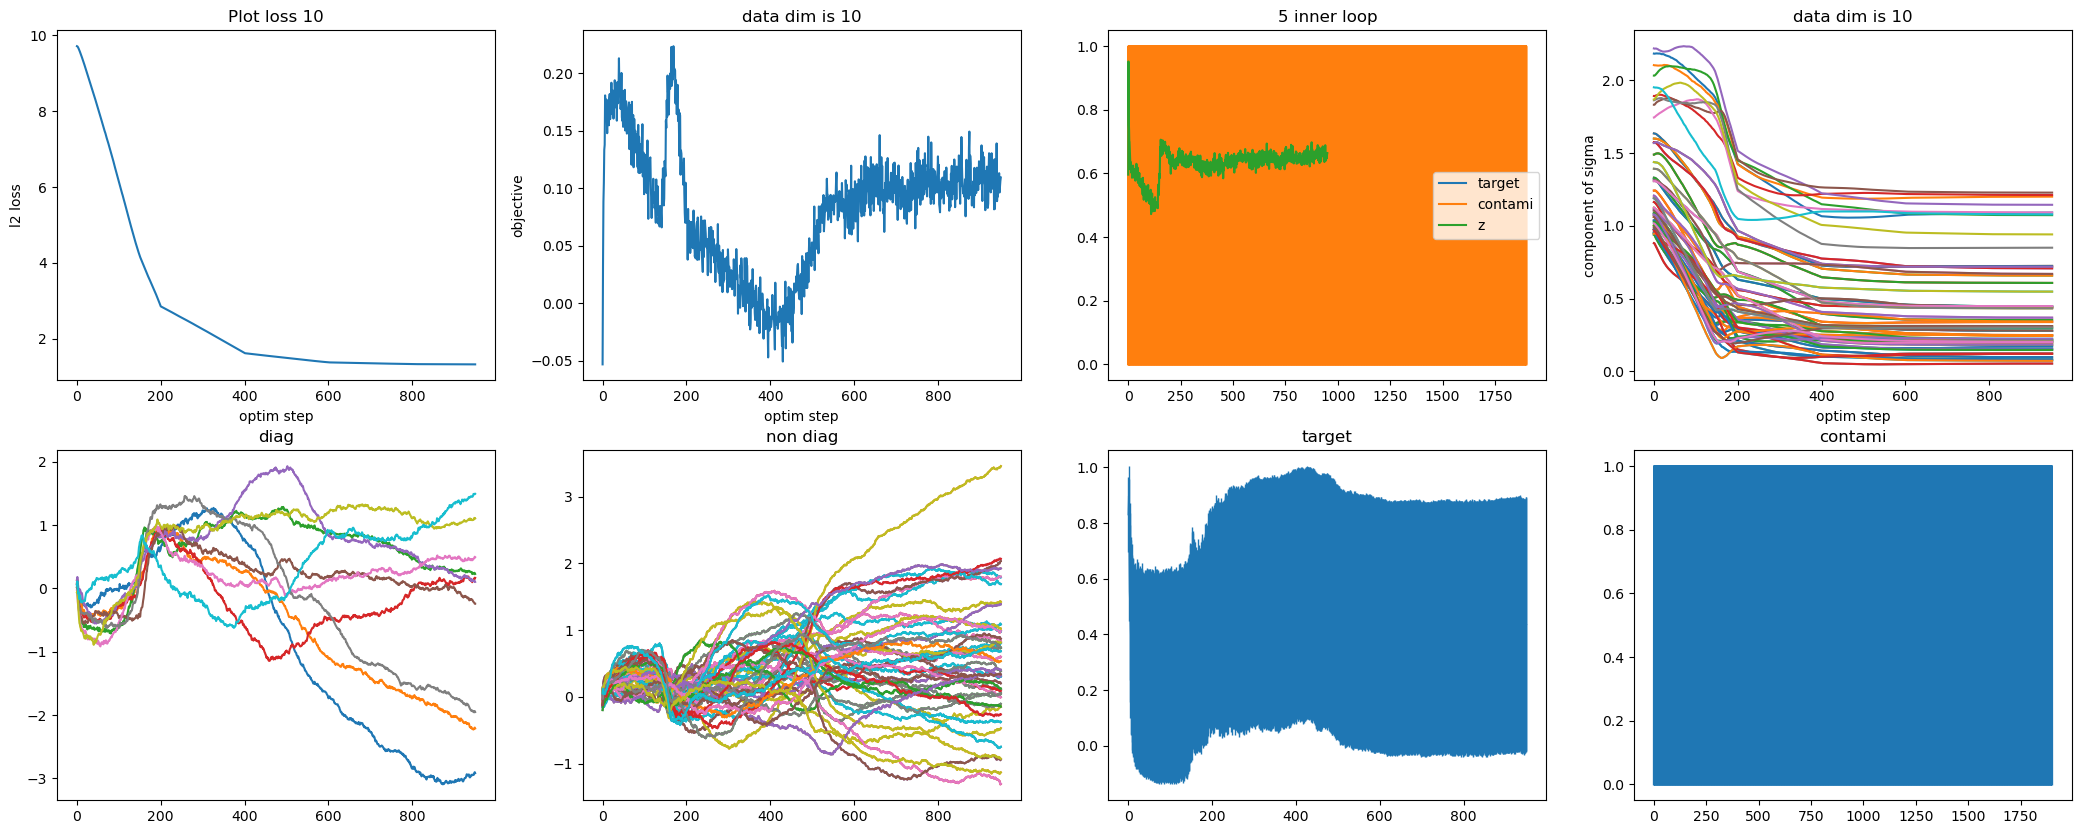

100%|██████████| 950/950 [00:12<00:00, 74.28it/s]


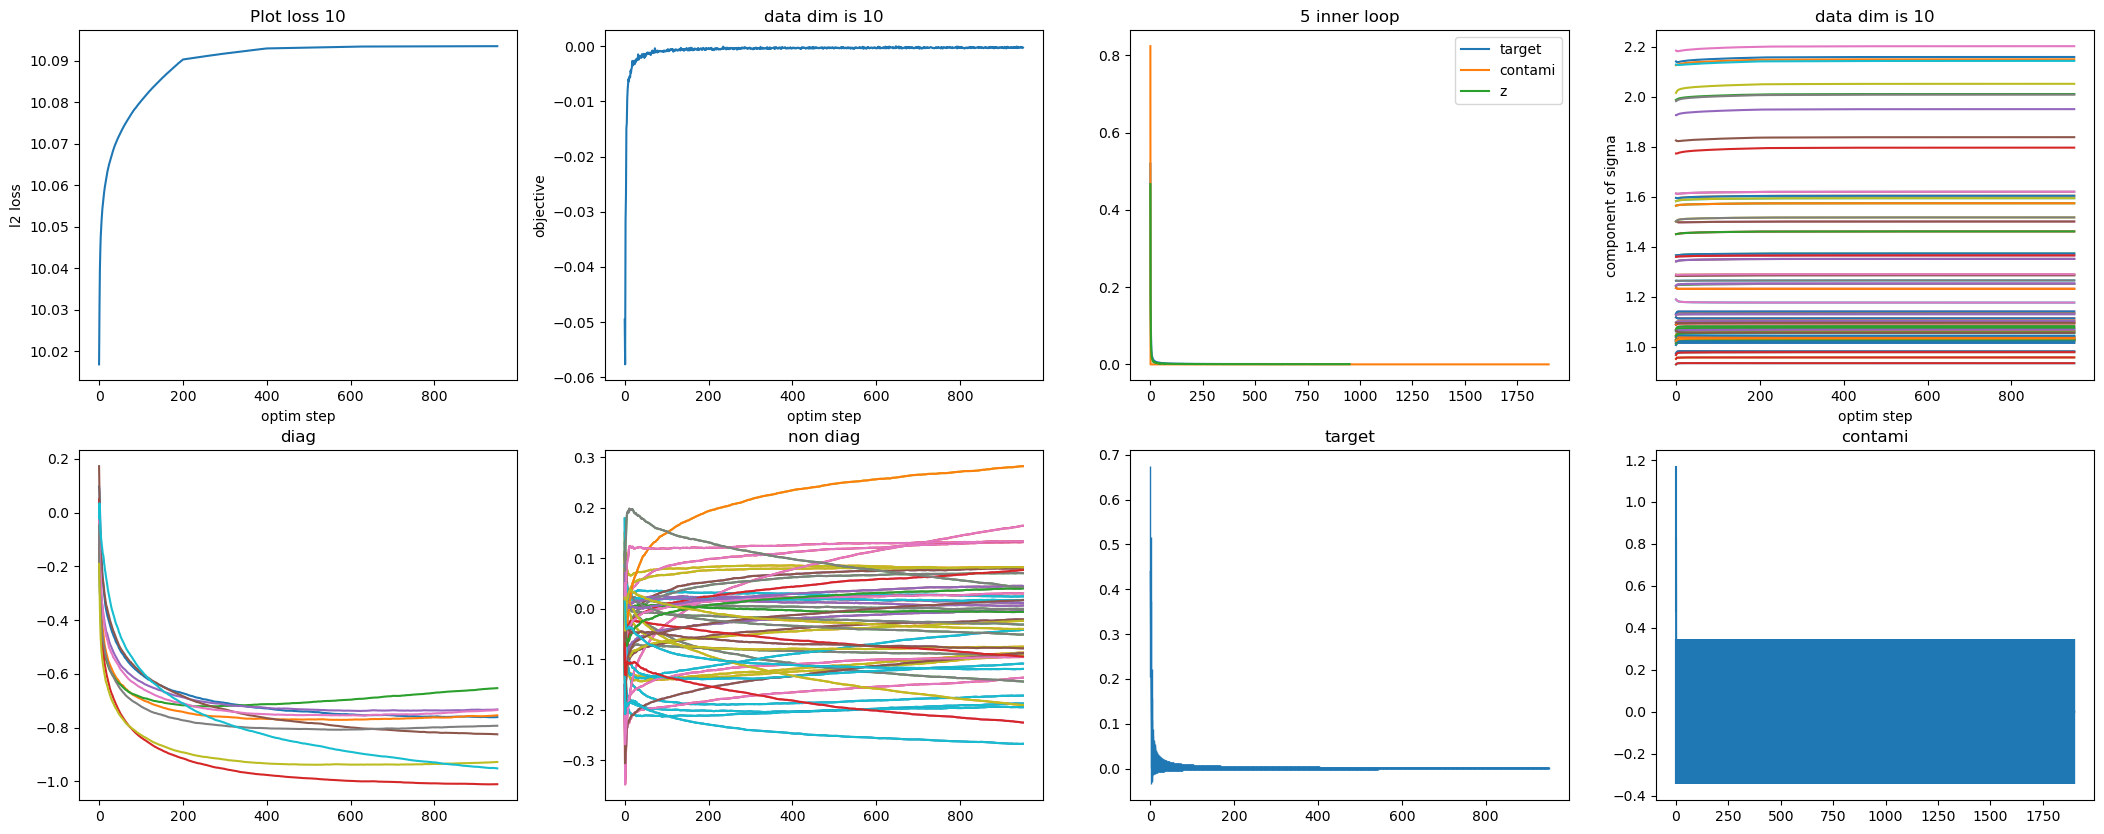

 81%|████████  | 765/950 [00:10<00:02, 76.64it/s]

In [4]:
optim_iter = 950
result_l2 = []
result_fro = []
for i in range(10):
    gan = GAN(10, 0.2)
    gan.dist_init('sigma', 0, 6, sigma_setting='ar')
    gan.data_init(1000, 1)
    gan.model_init(D_init_option='random', G_init_option='kendall')
    # gan.optimizer_init(1, 1, 0.35, 1e-4, 1e-4,
                        # update_D_iter=1, is_mm_alg=False)
    gan.optimizer_init(lr_d=1, lr_g=0.1, decay_g=0.2, reg_g=1e-4, reg_d=1e-4,
                        update_D_iter=5, is_mm_alg=False, decay_d=1, grad_clip=1e-3, lr_schedule='step',step=200)
    gan.fit(optim_iter, verbose=True)
    gan.record_npy(rcd_dir='record', rcd_name=f'test_{i}')
    gan.plot(fig_scale=1)
    plt.show()
    result_l2.append(gan.l2_loss[-1])
    result_fro.append(gan.fro_loss[-1])

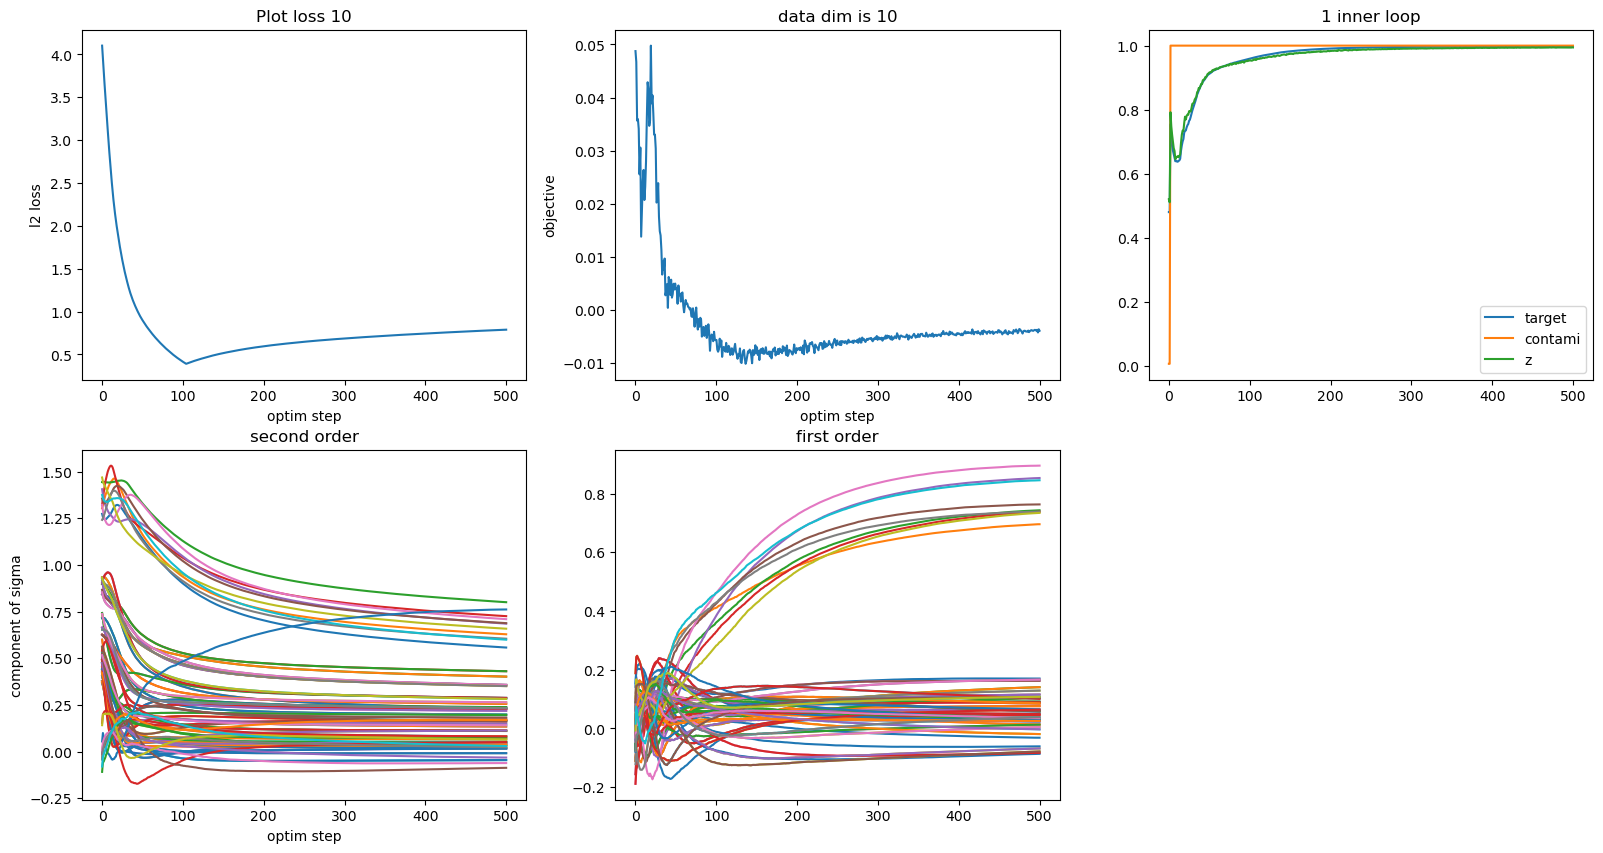

In [12]:
col_num = 3
row_num = 2
plt.figure(figsize=(6.5 * col_num, 5 * row_num))
plt.subplot(row_num, col_num, 1)
plt.plot(gan.l2_loss)
plt.xlabel('optim step')
plt.ylabel('l2 loss')
plt.title(f'Plot loss {gan.data_dim}')
plt.subplot(row_num, col_num, 2)
# for mean in gan.emperical_true_mean:
# #     plt.hlines(mean, 0, gan.optim_iter, colors='r', lw=1)
plt.plot(np.array(gan.objective))
plt.xlabel('optim step')
plt.ylabel('objective')
plt.title(f'data dim is {gan.data_dim}')
# plt.legend()
plt.subplot(row_num, col_num, 3)
plt.plot(gan.D_data_record, label='target')
plt.plot(gan.D_contami_record_mean,label='contami')
plt.plot(gan.D_z_record, label='z')
plt.title(f'{gan.update_D_iter} inner loop')
plt.legend()

plt.subplot(row_num, col_num, 4)
plt.plot(np.array(gan.G_record).reshape((len(gan.G_record)), gan.data_dim ** 2))
plt.xlabel('optim step')
plt.ylabel('component of sigma')
plt.title(f'data dim is {gan.data_dim}')

plt.subplot(row_num, col_num, 4)
plt.plot(np.array(gan.D_record)[:,:gan.data_dim]);
plt.title('second order')
plt.subplot(row_num, col_num, 5)
plt.plot(np.array(gan.D_record)[:,gan.data_dim:]);
plt.title('first order')


100%|██████████| 200/200 [01:47<00:00,  1.87it/s]


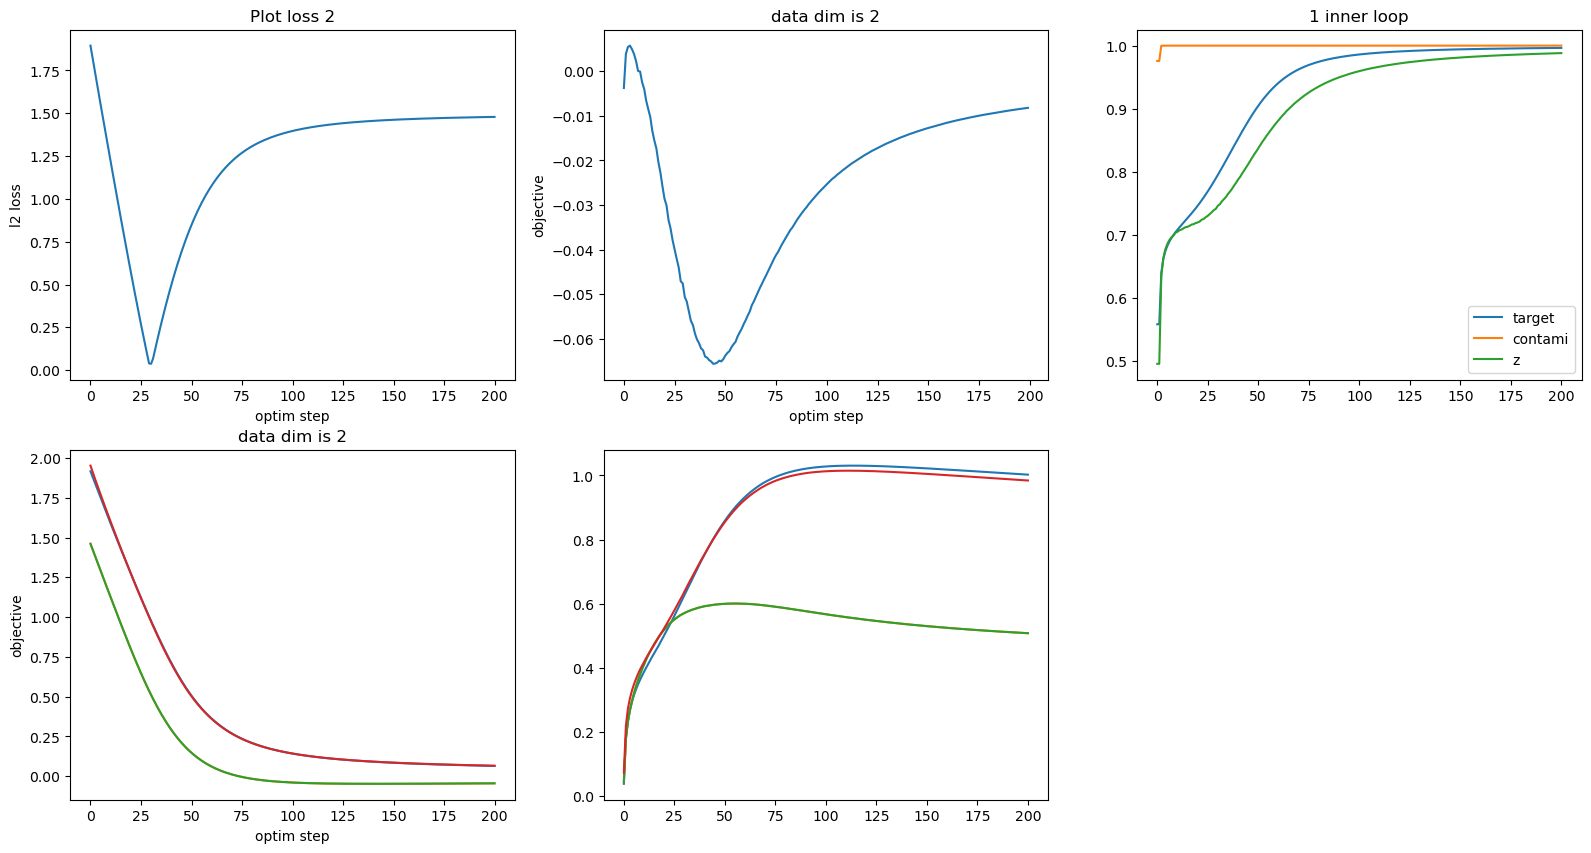

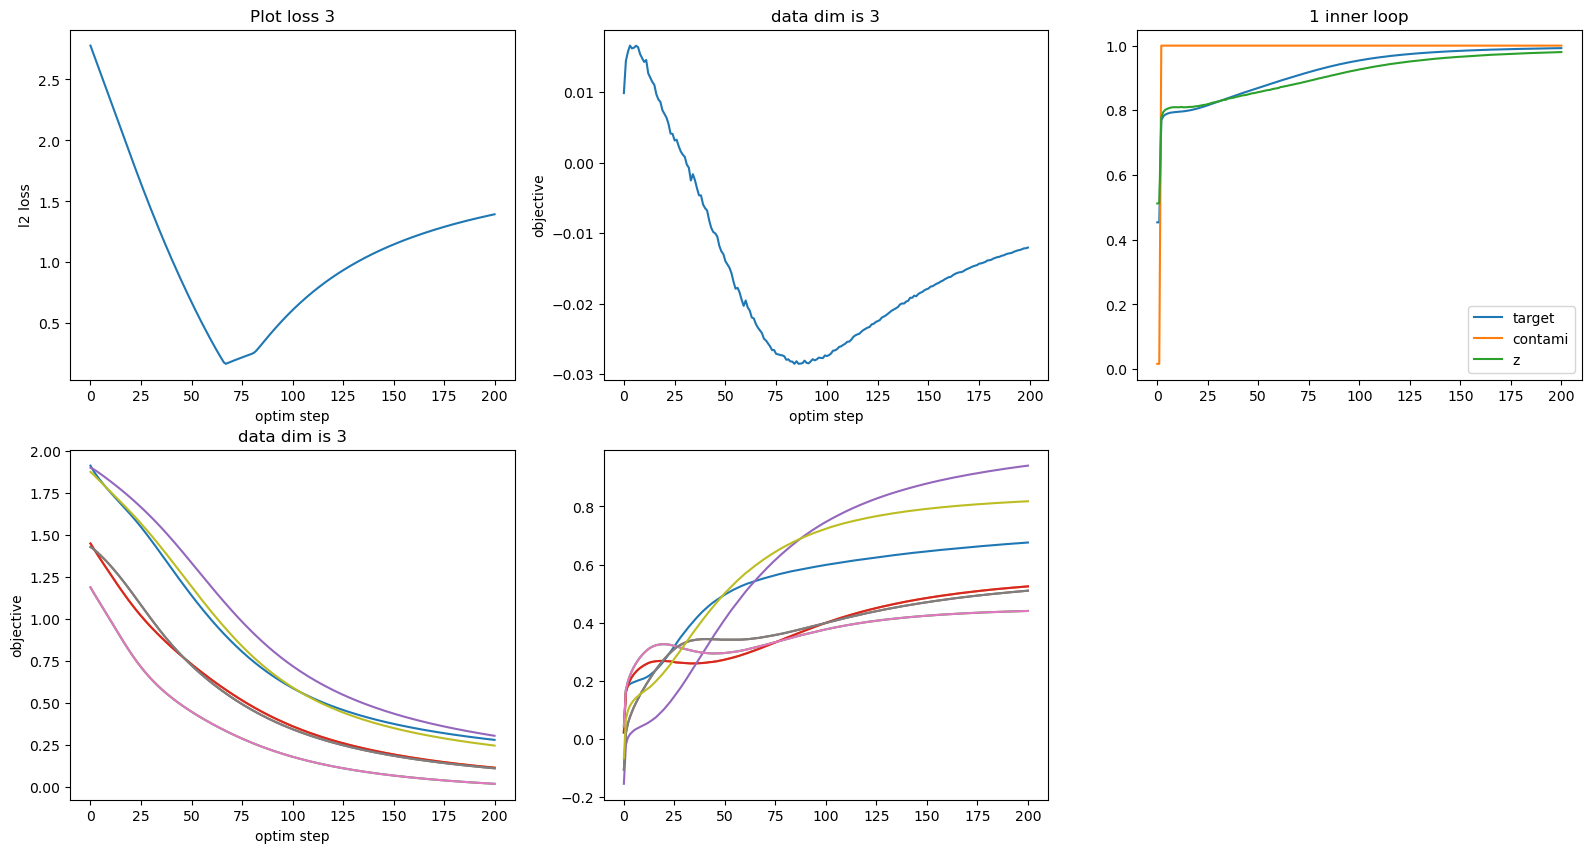

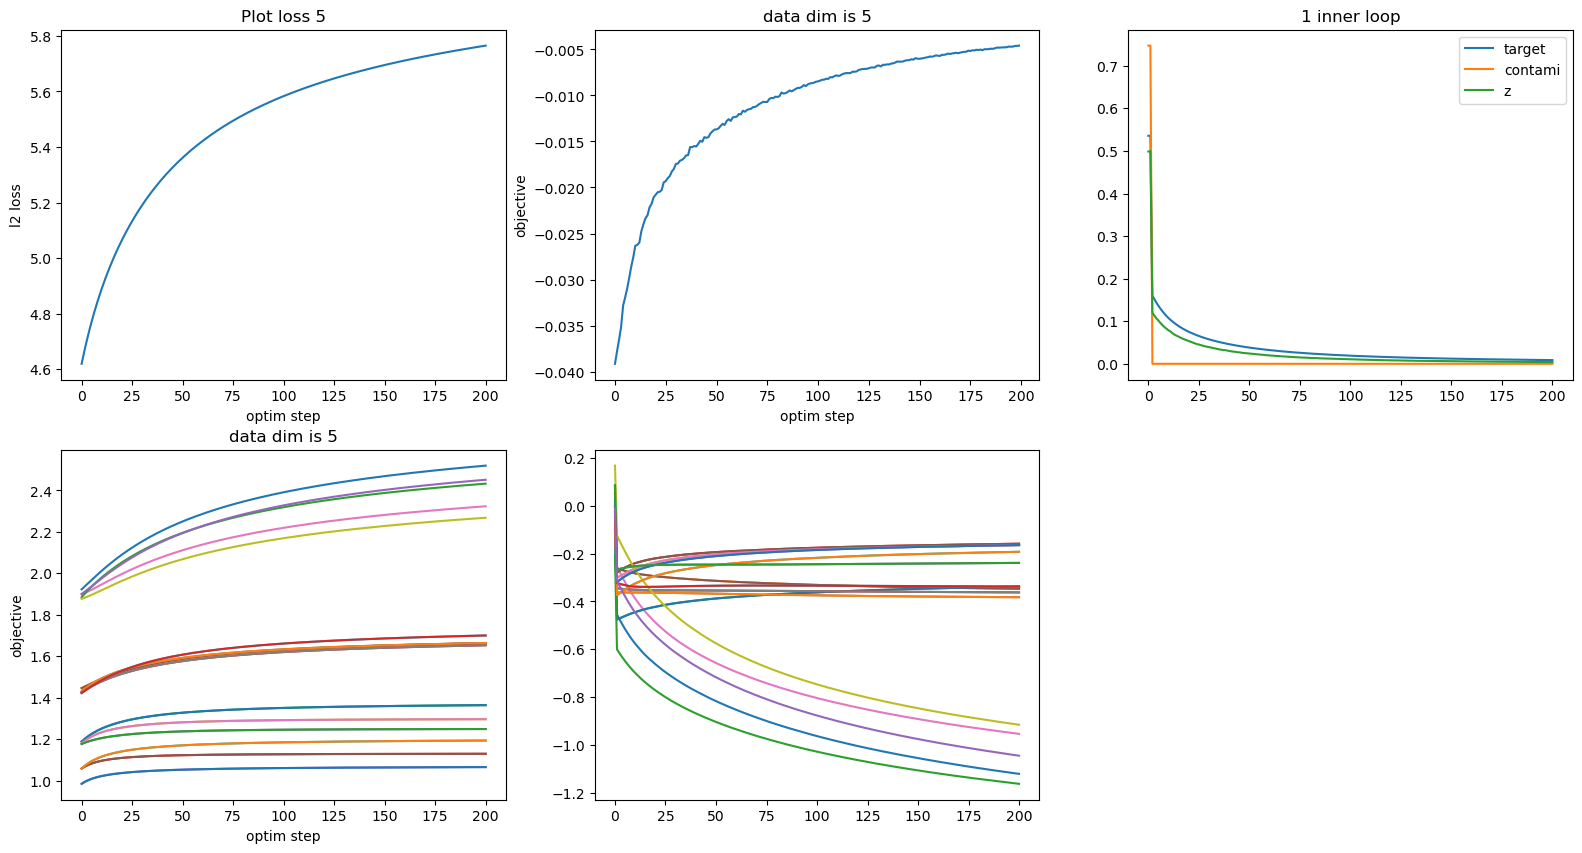

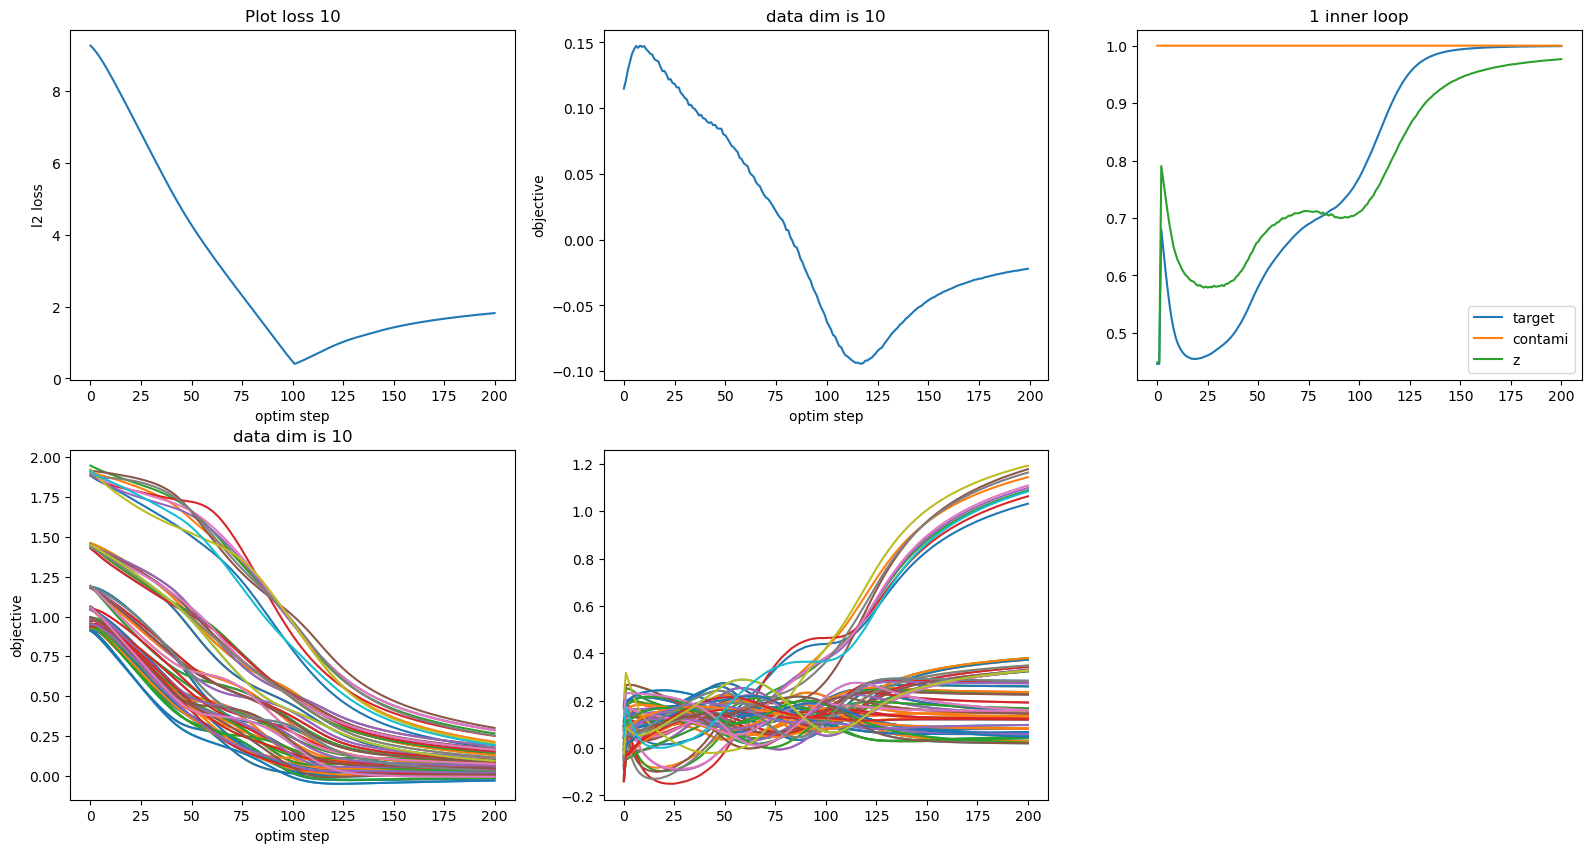

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from gan import gan as GAN
from tqdm import tqdm

dim = [2, 3, 5, 10]
for p in dim:
    gan = GAN(p, 0.2)
    gan.dist_init('sigma', 0, 5, sigma_setting='ar')
    gan.data_init(50000, 3)
    gan.model_init(D_init_option='random', G_init_option='kendall')
    # gan.D *= 0.3
    gan.optimizer_init(1, 3e-1, 0.0, 1e-5, 1e-4,
                        update_D_iter=1, is_mm_alg=False)
    gan.fit(200, verbose=True)
    col_num = 3
    row_num = 2
    plt.figure(figsize=(6.5 * col_num, 5 * row_num))
    plt.subplot(row_num, col_num, 1)
    plt.plot(gan.l2_loss)
    plt.xlabel('optim step')
    plt.ylabel('l2 loss')
    plt.title(f'Plot loss {gan.data_dim}')
    plt.subplot(row_num, col_num, 2)
    # for mean in gan.emperical_true_mean:
    # #     plt.hlines(mean, 0, gan.optim_iter, colors='r', lw=1)
    plt.plot(np.array(gan.objective))
    plt.xlabel('optim step')
    plt.ylabel('objective')
    plt.title(f'data dim is {gan.data_dim}')
    # plt.legend()
    plt.subplot(row_num, col_num, 3)
    plt.plot(gan.D_data_record, label='target')
    plt.plot(gan.D_contami_record_mean,label='contami')
    plt.plot(gan.D_z_record, label='z')
    plt.title(f'{gan.update_D_iter} inner loop')
    plt.legend()

    plt.subplot(row_num, col_num, 4)
    plt.plot(np.array(gan.G_record).reshape((len(gan.G_record)), gan.data_dim ** 2))
    plt.xlabel('optim step')
    plt.ylabel('objective')
    plt.title(f'data dim is {gan.data_dim}')
    plt.subplot(row_num, col_num, 5)
    plt.plot(gan.D_record)

In [ ]:
from gan import gan as GAN
gan = GAN(100, 0.1)
gan.dist_init('mu', 0, 5)
gan.data_init(1000, 3)
gan.model_init()
gan.optimizer_init(1, 0.5, 0.95, 1e-3, 3e-5, 1, 1, False, 0.1)
gan.fit(10000, 1e-7, True)